In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импортируем данные в виде таблиц

In [99]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df_fly = pd.read_csv(url1, sep=',', index_col=0)

url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
df_wth = pd.read_csv(url2, sep=',', index_col=0)

In [100]:
df_fly.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [43]:
df_wth.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


1. Для начала попытаемся получить общую информацию по задержкам рейсов, взяв среднее время по всем месяцам:

In [5]:
grouped_data1 = pd.DataFrame(df_fly.groupby([df_fly.month])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
print(grouped_data1)

    month  mean_delay_dep
0       1       10.036665
1       2       10.816843
2       3       13.227076
3       4       13.938038
4       5       12.986859
5       6       20.846332
6       7       21.727787
7       8       12.611040
8       9        6.722476
9      10        6.243988
10     11        5.435362
11     12       16.576688


Для наглядности изобразим эти данные на графике:

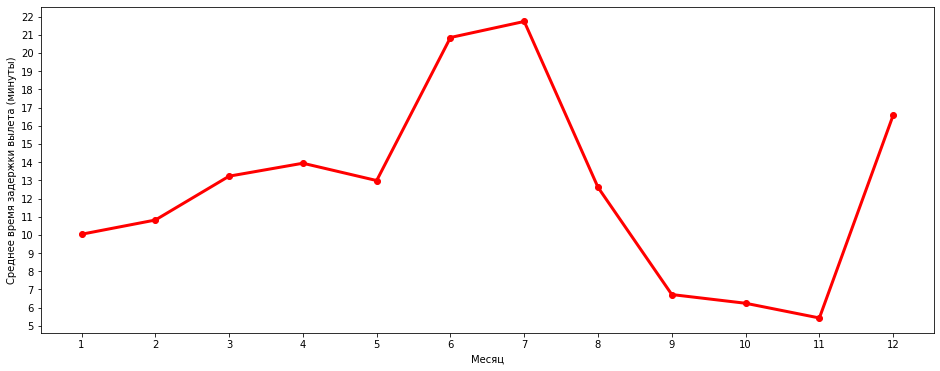

In [7]:
plt.figure(figsize = (16, 6))
plt.plot(grouped_data1.month, grouped_data1.mean_delay_dep, '-o', c='red', linewidth=3)

plt.xticks(range(1, 13))
plt.yticks(range(5, 23))
plt.ylabel('Среднее время задержки вылета (минуты)')
plt.xlabel('Месяц')
plt.show()

Мы видим, что, в среднем, в июне-июле и в декабре среднее время задержки вылетов значительно выше, что неудивительно, так как в это время люди летят в отпуск в горы или на море.

2. Проведем аналогичные рассуждения, только на этот раз будем смотреть среднее время задержки рейсов по часам дня:

In [8]:
grouped_data1 = pd.DataFrame(df_fly.groupby([df_fly.hour])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
print(grouped_data1)

    hour  mean_delay_dep
0    0.0      128.642452
1    1.0      207.049327
2    2.0      239.921875
3    3.0      304.727273
4    4.0       -5.554098
5    5.0       -4.355644
6    6.0       -1.520552
7    7.0        0.223289
8    8.0        1.091432
9    9.0        4.268295
10  10.0        5.548644
11  11.0        5.652309
12  12.0        7.601892
13  13.0        9.380639
14  14.0        8.090381
15  15.0       10.682049
16  16.0       13.621150
17  17.0       16.756593
18  18.0       18.664671
19  19.0       21.497342
20  20.0       28.266213
21  21.0       42.064964
22  22.0       68.190042
23  23.0       96.946865
24  24.0       64.862069


In [9]:
grouped_data2 = pd.DataFrame(df_fly.groupby([df_fly.hour]).size().reset_index(name='count_of_flights'))
print(grouped_data2)

    hour  count_of_flights
0    0.0               881
1    1.0               223
2    2.0                64
3    3.0                11
4    4.0               305
5    5.0              7246
6    6.0             22699
7    7.0             21461
8    8.0             26424
9    9.0             18871
10  10.0             16076
11  11.0             16762
12  12.0             16071
13  13.0             16890
14  14.0             20480
15  15.0             22840
16  16.0             22336
17  17.0             22144
18  18.0             21549
19  19.0             19940
20  20.0             16160
21  21.0             10960
22  22.0              5483
23  23.0              2616
24  24.0                29


Изобразим на графиках:

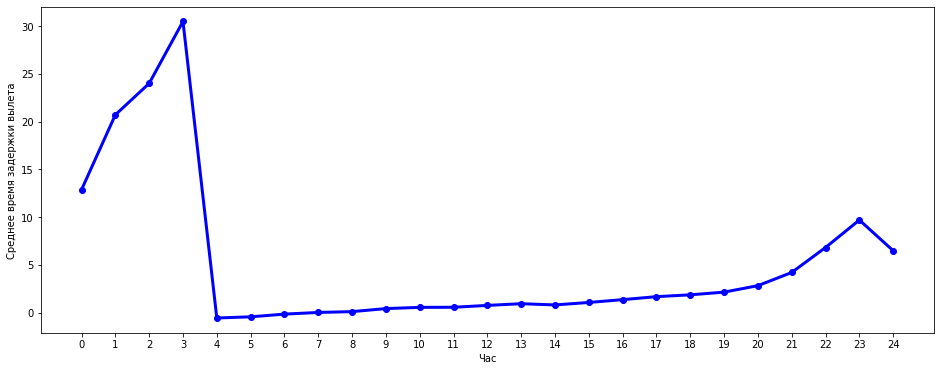

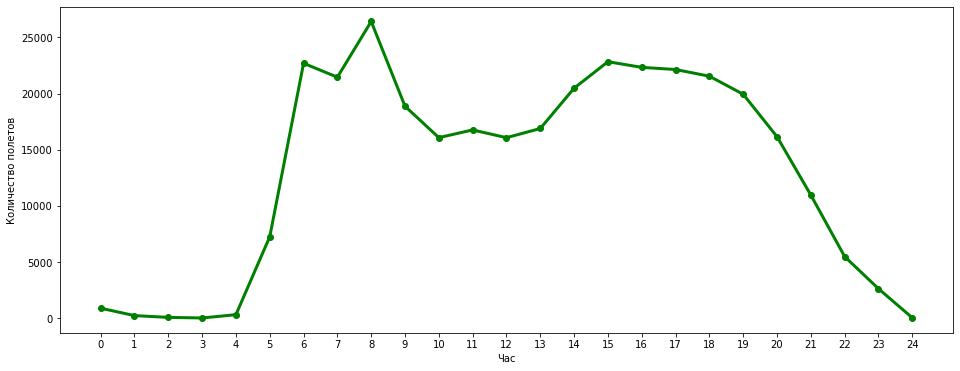

In [10]:
plt.figure(figsize = (16, 6))
plt.plot(grouped_data1.hour, grouped_data1.mean_delay_dep / 10, '-o', c='blue', linewidth=3)

plt.xticks(range(0, 25))
plt.ylabel('Среднее время задержки вылета')
plt.xlabel('Час')
plt.show()

plt.figure(figsize = (16, 6))
plt.plot(grouped_data2.hour, grouped_data2.count_of_flights, '-o', c='green', linewidth=3)

plt.xticks(range(0, 25))
plt.ylabel('Количество полетов')
plt.xlabel('Час')
plt.show()

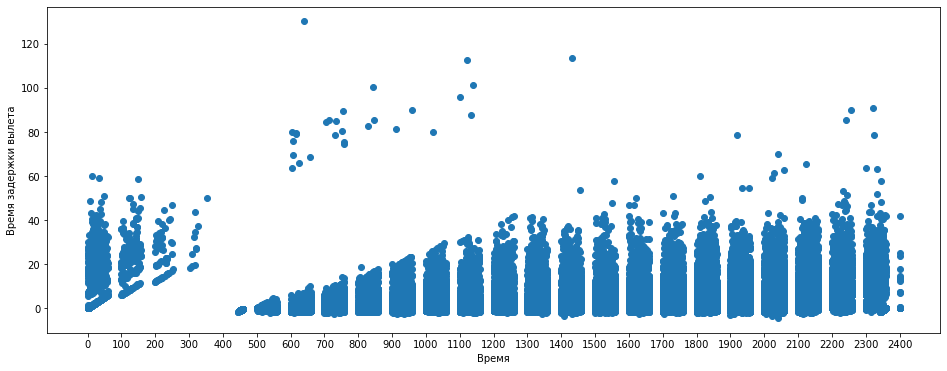

In [15]:
plt.figure(figsize = (16, 6))
plt.scatter(df_fly.dep_time, df_fly.dep_delay / 10)

plt.xticks(range(0, 2500, 100))
plt.ylabel('Время задержки вылета')
plt.xlabel('Время')
plt.show()

Человеку, никогда не бывавшему в аэропортах, а только владеющему сухой информацией, будет сложно проанализировать эти данные. Ведь неппонятно, почему больше всего рейсов производится в 6-8 часов утра, а время их задержки минимальное? И наоборот, меньше всего рейсов в 2-3 ночи, но на это время приходится пик задержки?

Аэропорты работают в бешеном режиме (простаивание самолеты на земле стоит авиакомпаниям огромные деньги, поэтому это время стараются минимализировать). Поэтому самолеты улетают и прилетают с очень большой частотой (это можно увидеть на многочисленных таймлапсах, снятых на влзетно-посадочных полосах). Поэтому, при таком ритме, действует так называемый прицнип домино: если один самолет задержится на минуту, то и все следующие задержатся на эту минуту, и так далее. Поэтому мы и видим непрерывный рост среднего времени задержек, начиная с 4 часов утра, заканчивая 23, потому что эти времена накапливаются.

Остаются ночные часы, когда рейсов минимальное количество, а время их задержки максимальное. Я это объясняю тем, что в это время как раз и производятся рейсы, отмененные днем из-за некоторых форс-мажоров, у которых, соответственно, время задержки очень большое.

3. Сделаем то же самое, только теперь уже для дней недели:

In [19]:
df_fly_week = df_fly

In [20]:
df_fly_week['Date'] = df_fly_week['year'].astype(str) + '-' + df_fly_week['month'].astype(str) + '-' + df_fly_week['day'].astype(str)
df_fly_week['Date'] = pd.to_datetime(df_fly_week['Date'])

df_fly_week['day_w'] = df_fly_week['Date'].dt.dayofweek
days = {0: '0Mon', 1: '1Tue', 2: '2Wed', 3: '3Thur', 4: '4Fri', 5: '5Sat', 6: '6Sun'}
df_fly_week['day_w'] = df_fly_week['day_w'].apply(lambda x: days[x])
df_fly_week.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Date,day_w
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01,1Tue
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01,1Tue
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01,1Tue
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01,1Tue
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01,1Tue


In [21]:
grouped_data1 = pd.DataFrame(df_fly_week.groupby([df_fly_week.day_w])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
print(grouped_data1)

   day_w  mean_delay_dep
0   0Mon       14.778937
1   1Tue       10.631683
2   2Wed       11.803512
3  3Thur       16.148920
4   4Fri       14.696057
5   5Sat        7.650502
6   6Sun       11.589532


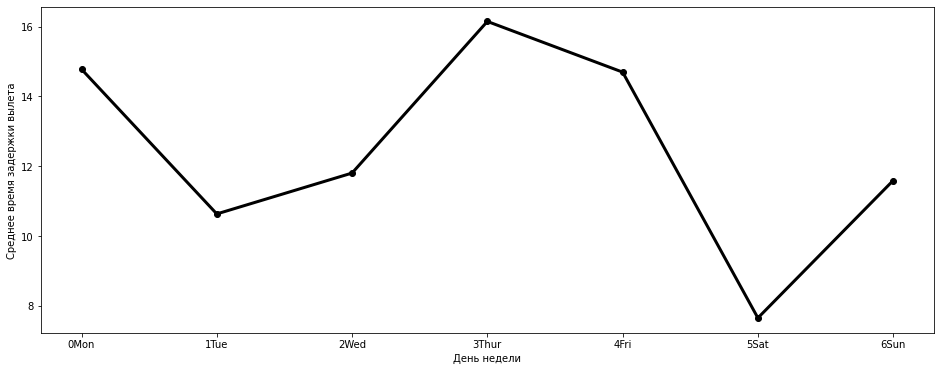

In [22]:
plt.figure(figsize = (16, 6))
plt.plot(grouped_data1.day_w, grouped_data1.mean_delay_dep, '-o', c='black', linewidth=3)

plt.xticks(range(0, 7))
plt.ylabel('Среднее время задержки вылета')
plt.xlabel('День недели')
plt.show()

Получаем довольно любопытный факт: наименьшее среднее время задержки рейсов в субботу, а наибольшее - в четверг. Для объяснения данного факта, посмотрим на количество рейсов за год в каждый из дней недели:

In [24]:
grouped_data2 = pd.DataFrame(df_fly_week.groupby([df_fly_week.day_w]).size().reset_index(name='count_of_flights'))
print(grouped_data2)

   day_w  count_of_flights
0   0Mon             50690
1   1Tue             50422
2   2Wed             50060
3  3Thur             50219
4   4Fri             50308
5   5Sat             38720
6   6Sun             46357


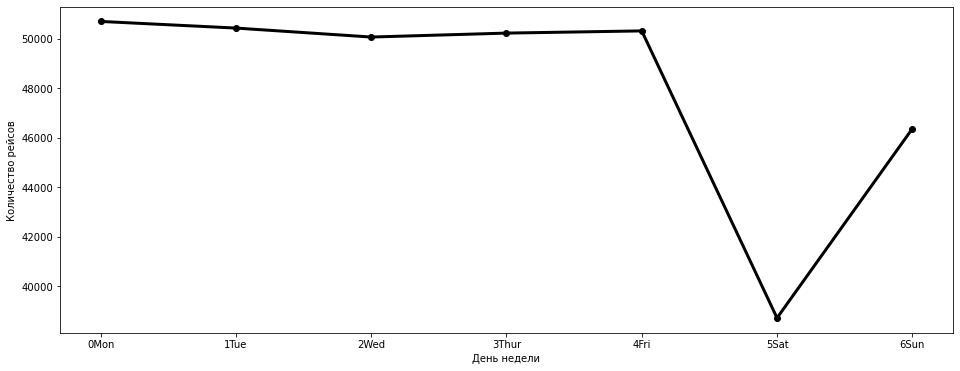

In [25]:
plt.figure(figsize = (16, 6))
plt.plot(grouped_data2.day_w, grouped_data2.count_of_flights, '-o', c='black', linewidth=3)

plt.xticks(range(0, 7))
plt.ylabel('Количество рейсов')
plt.xlabel('День недели')
plt.show()

Видим еще более занимательный факт (как для русского человека): в субботу рейсов меньше всего, причем этот день выделяется среди других достаточно сильно. Это связано с тем, что в США неделя заканчивается не в воскресенье, привычное нам, а как раз в субботу, поэтому рейсов в последний день недели меньше, откуда и может следовать факт, что среднее время задержки - минимальное. Ну и отсюда же следует на первый взгяд такой же неочевидный факт, что в четверг задержка рейсов максимальная, - для американцев четверг - как наша пятница, многие хотят улететь куда-нибудь на выходные, отдохнуть от работы, поэтому случается небольшой коллапс.

4. Посмотрим на зависимость задержки авиарейсов от аэропортов:

In [26]:
grouped_data1 = pd.DataFrame(df_fly.groupby([df_fly.origin]).size().reset_index(name='count_of_flights'))
print(grouped_data1)

  origin  count_of_flights
0    EWR            120835
1    JFK            111279
2    LGA            104662


In [27]:
grouped_data2 = pd.DataFrame(df_fly.groupby([df_fly.origin])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
print(grouped_data2)

  origin  mean_delay_dep
0    EWR       15.107954
1    JFK       12.112159
2    LGA       10.346876


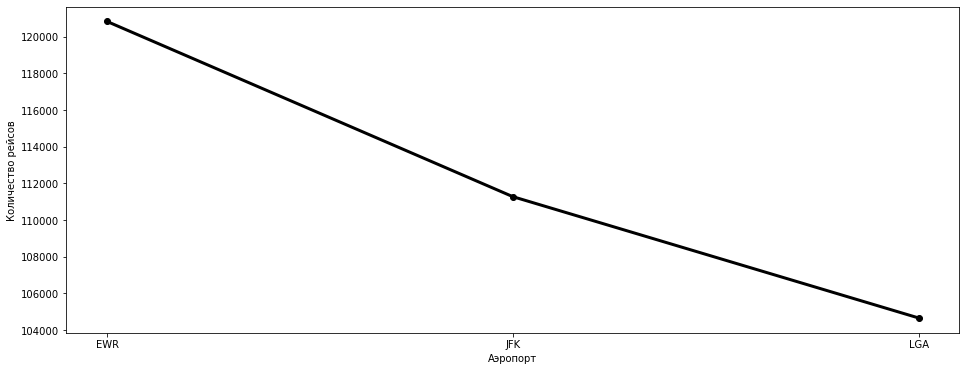

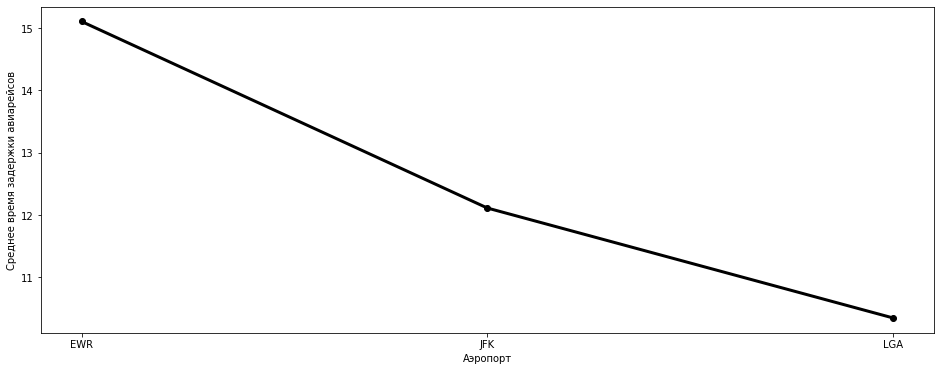

In [28]:
plt.figure(figsize = (16, 6))
plt.plot(grouped_data1.origin, grouped_data1.count_of_flights, '-o', c='black', linewidth=3)

plt.ylabel('Количество рейсов')
plt.xlabel('Аэропорт')
plt.show()


plt.figure(figsize = (16, 6))
plt.plot(grouped_data2.origin, grouped_data2.mean_delay_dep, '-o', c='black', linewidth=3)

plt.ylabel('Среднее время задержки авиарейсов')
plt.xlabel('Аэропорт')
plt.show()

Видим, что в авиарейсы из аэропорта EWR, в среднем, задерживаются на время, в полтора раза большее, чем из аэропорта LGA, причем эта разница существенна, не смотря на разницу в количестве полетов (которая составляет примерно 1600)

5. Теперь же посмотрим на зависимость от места прибытия

(Возьмем топ-30)

In [29]:
grouped_data1 = pd.DataFrame(df_fly.groupby([df_fly.dest]).size().reset_index(name='count_of_flights'))
df_sorted = grouped_data1.sort_values("count_of_flights", ascending=False)
df_sorted_top = df_sorted.head(30)
print(df_sorted_top)

    dest  count_of_flights
69   ORD             17283
4    ATL             17215
49   LAX             16174
11   BOS             15508
54   MCO             14082
23   CLT             14064
90   SFO             13331
35   FLL             12055
58   MIA             11728
28   DCA              9705
32   DTW              9384
30   DFW              8738
80   RDU              8163
100  TPA              7466
29   DEN              7266
43   IAH              7198
61   MSP              7185
71   PBI              6554
10   BNA              6333
48   LAS              5997
92   SJU              5819
42   IAD              5700
14   BUF              4681
74   PHX              4656
22   CLE              4573
97   STL              4339
55   MDW              4113
26   CVG              3941
89   SEA              3923
62   MSY              3799


In [30]:
grouped_data2 = pd.DataFrame(df_fly.groupby([df_fly.dest])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
print(grouped_data2)

    dest  mean_delay_dep
0    ABQ       13.740157
1    ACK        6.456604
2    ALB       23.620525
3    ANC       12.875000
4    ATL       12.509824
..   ...             ...
100  TPA       12.135007
101  TUL       34.906355
102  TVC       22.083333
103  TYS       28.493955
104  XNA        6.464886

[105 rows x 2 columns]


In [32]:
df_dest_merged = pd.merge(df_sorted_top, grouped_data2, on=['dest'])
print(df_dest_merged)

   dest  count_of_flights  mean_delay_dep
0   ORD             17283       13.570484
1   ATL             17215       12.509824
2   LAX             16174        9.401344
3   BOS             15508        8.730613
4   MCO             14082       11.275998
5   CLT             14064        9.222879
6   SFO             13331       12.866289
7   FLL             12055       12.731104
8   MIA             11728        8.876558
9   DCA              9705       10.293000
10  DTW              9384       11.812252
11  DFW              8738        8.681909
12  RDU              8163       12.445870
13  TPA              7466       12.135007
14  DEN              7266       15.156228
15  IAH              7198       10.842179
16  MSP              7185       13.324806
17  PBI              6554       12.992918
18  BNA              6333       15.982471
19  LAS              5997        9.418819
20  SJU              5819        9.808841
21  IAD              5700       16.982935
22  BUF              4681       13

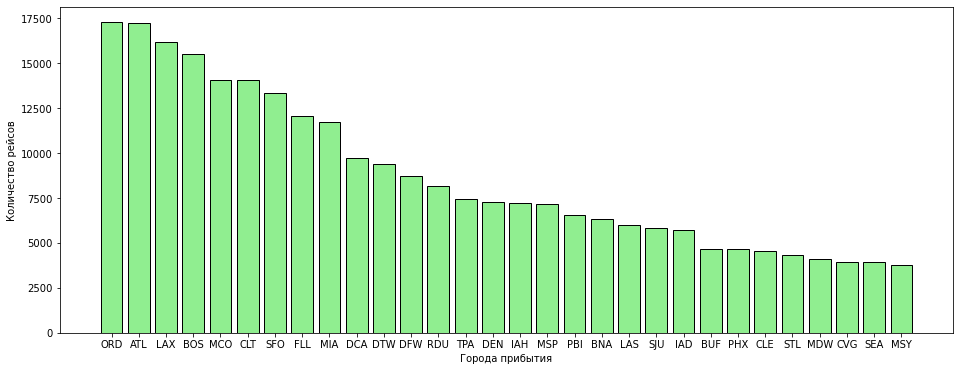

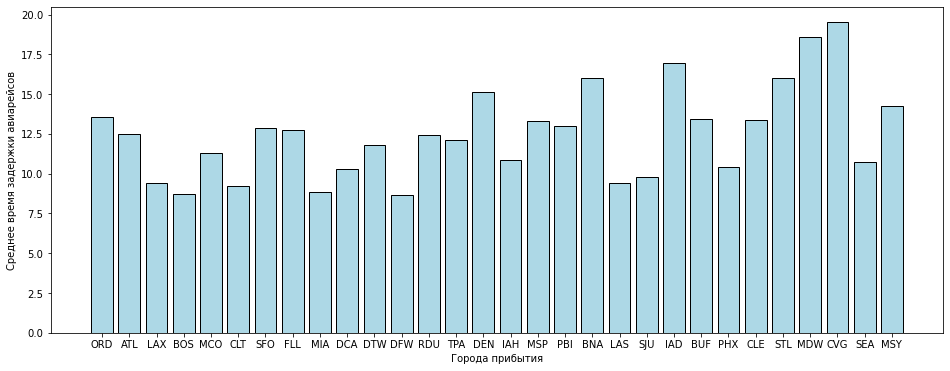

In [33]:
plt.figure(figsize = (16, 6))
plt.bar(df_dest_merged.dest, df_dest_merged.count_of_flights, color='lightgreen', edgecolor = 'black')

plt.ylabel('Количество рейсов')
plt.xlabel('Города прибытия')
plt.show()


plt.figure(figsize = (16, 6))
plt.bar(df_dest_merged.dest, df_dest_merged.mean_delay_dep, color='lightblue', edgecolor = 'black')

plt.ylabel('Среднее время задержки авиарейсов')
plt.xlabel('Города прибытия')
plt.show()

Из подобных таблиц можно получать довольно содержательную статистику по каждому городу: например LAX (?) и BOS  (Бостон) являются топ-3 и топ-4 городами соответственно по количеству авиарейсов из Нью-Йорка в 2013 году, но имеют одни из наименьших средних времен задержки из топ-30 городов, что является очень хорошим показателем.

И наоборот, если посмотреть на MDW (?) и CVG (?), которые находятся в конце первой тридцатки городов по количеству рейсов, то можно увидеть, что средние времена ожидания, как ни странно, наибольшие в данной выборке. 

Данные таблицы можно расширить на более большой диапазон городов, но во избежание нагромождение картинок, привожу только первые 30.

6. Проанализируем задержки авиарейсвов в зависимости от авиакомпании:

In [34]:
grouped_data1 = pd.DataFrame(df_fly.groupby([df_fly.carrier]).size().reset_index(name='count_of_flights'))
print(grouped_data1)

   carrier  count_of_flights
0       9E             18460
1       AA             32729
2       AS               714
3       B6             54635
4       DL             48110
5       EV             54173
6       F9               685
7       FL              3260
8       HA               342
9       MQ             26397
10      OO                32
11      UA             58665
12      US             20536
13      VX              5162
14      WN             12275
15      YV               601


In [35]:
grouped_data2 = pd.DataFrame(df_fly.groupby([df_fly.carrier])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
print(grouped_data2)

   carrier  mean_delay_dep
0       9E       16.725769
1       AA        8.586016
2       AS        5.804775
3       B6       13.022522
4       DL        9.264505
5       EV       19.955390
6       F9       20.215543
7       FL       18.726075
8       HA        4.900585
9       MQ       10.552041
10      OO       12.586207
11      UA       12.106073
12      US        3.782418
13      VX       12.869421
14      WN       17.711744
15      YV       18.996330


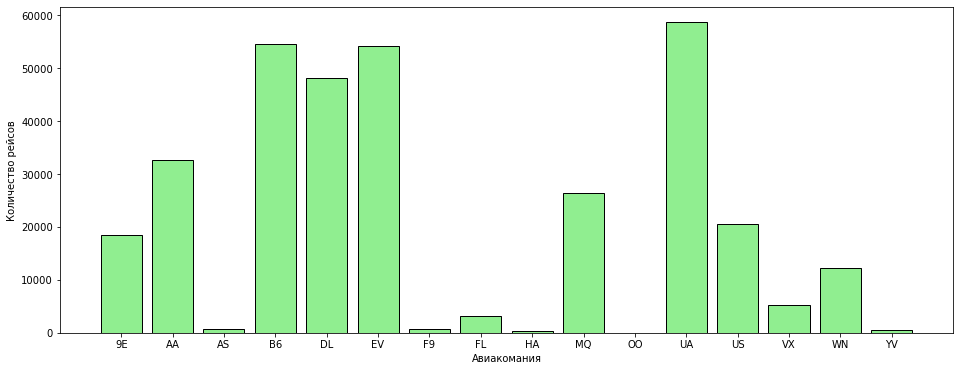

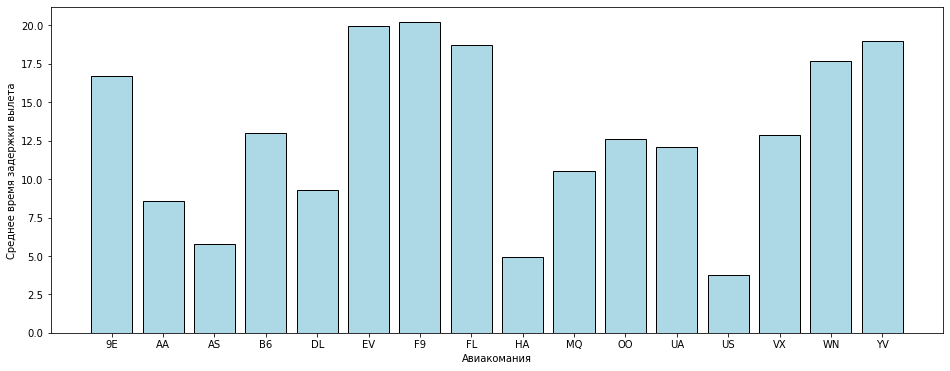

In [36]:
plt.figure(figsize = (16, 6))
plt.bar(grouped_data1.carrier, grouped_data1.count_of_flights, color='lightgreen', edgecolor = 'black')

plt.ylabel('Количество рейсов')
plt.xlabel('Авиакомания')
plt.show()

plt.figure(figsize = (16, 6))
plt.bar(grouped_data2.carrier, grouped_data2.mean_delay_dep, color='lightblue', edgecolor = 'black')

plt.ylabel('Среднее время задержки вылета')
plt.xlabel('Авиакомания')
plt.show()

Отсюда можно сделать несколько выводов:

1) Авиакомании B6, DL, EV и UA являются топовыми по числу авиарейсов, причем у B6, DL и UA среднее время задержки - среднее, относительно других авиакомпаний. У EV же оно одно из максимальных.

2) Авиакомании 9E, AA, MQ, US и WN - средние. У 9E и WN время задержки большое, у AA и Mq - среднее. На US остановимся поподробнее. Среднее время задержки у этой авиакомпании минимальное среди всех, и, учитывая ее название, рискну предположить, что эта компания занимается внутренними перелетами, не требующих особых проверок на паспортных контролях.

3) У остальных же компаний количество авиарейсов минимальное, причем почти у всех среднее время задержки большое.

Погода

Теперь будем проволить анализ относительно погодных условий. Объеденим таблицы, взяв только нужную информацию:

In [41]:
df_filter = df_fly[(df_fly.dep_delay > 0)] 

df = df_filter[['origin', 'month', 'day', 'hour', 'dep_delay']]

In [44]:
df_wth_fly_merged = pd.merge(df, df_wth, on=['origin','hour','day','month'])
df_wth_fly_merged.head()

,origin,month,day,hour,dep_delay,year,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,1,1,6.0,1.0,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,EWR,1,1,6.0,8.0,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,EWR,1,1,6.0,24.0,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,EWR,1,1,6.0,8.0,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,EWR,1,1,6.0,1.0,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


7. Объеденив таблицы, сгруппируем данные, чтобы можно было найти зависимость задержки рейсов от видимости:

In [45]:
df_visib = df_wth_fly_merged.dropna(subset = ['visib'])

In [50]:
grouped_data1 = pd.DataFrame(df_fly.groupby([df_visib.visib]).size().reset_index(name='count_of_flights'))
grouped_data2 = pd.DataFrame(df_fly.groupby([df_visib.visib])['dep_delay'].mean().reset_index(name='mean_delay_dep'))

In [53]:
df_visib_merged = pd.merge(grouped_data1, grouped_data2, on=['visib'])
print(df_visib_merged)

    visib  count_of_flights  mean_delay_dep
0    0.12                28       14.214286
1    0.25               278        3.662921
2    0.50               299       12.123711
3    0.75                83       17.397590
4    1.00               224       15.231818
5    1.25                15       15.933333
6    1.50               453        9.834467
7    1.75                28       23.392857
8    2.00               877        7.677120
9    2.50               468       12.564220
10   3.00               966        6.983589
11   4.00               639        5.198113
12   5.00               967       12.844538
13   6.00              1023        8.000981
14   7.00              1067        7.936792
15   8.00              1086        9.216730
16   9.00              2455        7.167910
17  10.00             41600        8.392331


Для наглядности, построим графики:

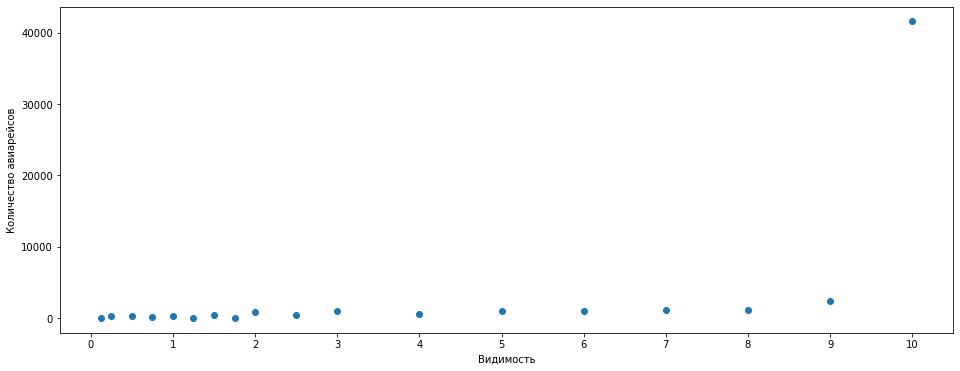

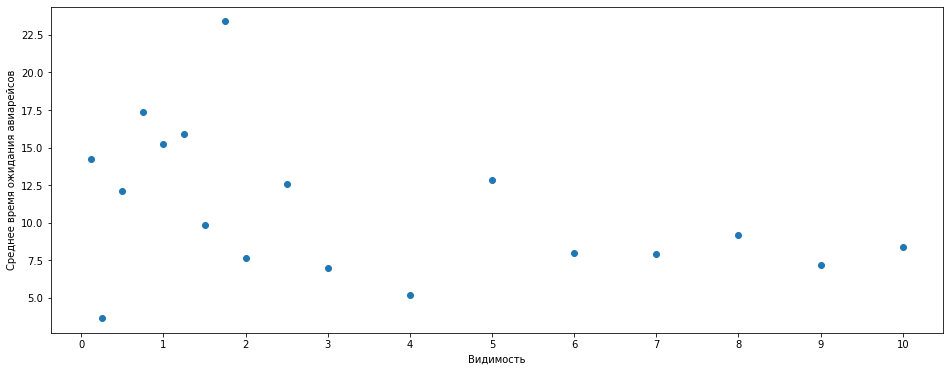

In [58]:
plt.figure(figsize = (16, 6))
plt.scatter(df_visib_merged.visib, df_visib_merged.count_of_flights)

plt.xticks(range(0, 11))
plt.ylabel('Количество авиарейсов')
plt.xlabel('Видимость')
plt.show()


plt.figure(figsize = (16, 6))
plt.scatter(df_visib_merged.visib, df_visib_merged.mean_delay_dep)

plt.xticks(range(0, 11))
plt.ylabel('Среднее время ожидания авиарейсов')
plt.xlabel('Видимость')
plt.show()

Из графиков мы можем сделать вывод, что погода сильно влияет на время задержеи авиарейсов: при низкой видимости время задержки значительно больше, нежели при высокой. И, что понятно, подавляющее число рейсов проводится при наилучшей видимости.

8. Теперь посмотрим на зависимость задержек от скорости ветра:

In [55]:
df_wind = df_wth_fly_merged.dropna(subset = ['wind_speed'])

In [56]:
grouped_data1 = pd.DataFrame(df_wind.groupby([df_wind.wind_speed]).size().reset_index(name='count_of_flights'))
grouped_data2 = pd.DataFrame(df_wind.groupby([df_wind.wind_speed])['dep_delay'].mean().reset_index(name='mean_delay_dep'))

In [57]:
df_wind_merged = pd.merge(grouped_data1, grouped_data2, on=['wind_speed'])
print(df_wind_merged)

    wind_speed  count_of_flights  mean_delay_dep
0      0.00000              3190       34.172414
1      3.45234              2808       31.768875
2      4.60312              3727       34.301315
3      5.75390              4366       36.163078
4      6.90468              4746       39.094606
5      8.05546              4260       37.998357
6      9.20624              4762       40.424402
7     10.35702              4020       36.919154
8     11.50780              3962       40.625694
9     12.65858              3501       41.355041
10    13.80936              2961       41.961837
11    14.96014              2490       42.446185
12    16.11092              1876       46.489339
13    17.26170              1598       45.197121
14    18.41248              1225       40.513469
15    19.56326               694       40.818444
16    20.71404               623       42.611557
17    21.86482               520       40.111538
18    23.01560               311       43.221865
19    24.16638      

Видим, что одно наблюдение, когда скорость ветра >1000, сильно выбивается из выборки, так что не будем его учитывать, поэтому посмотрим на визуализацию без него:

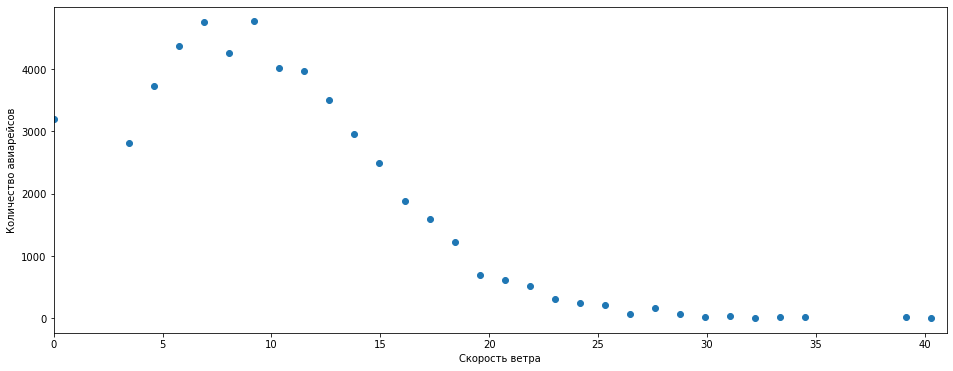

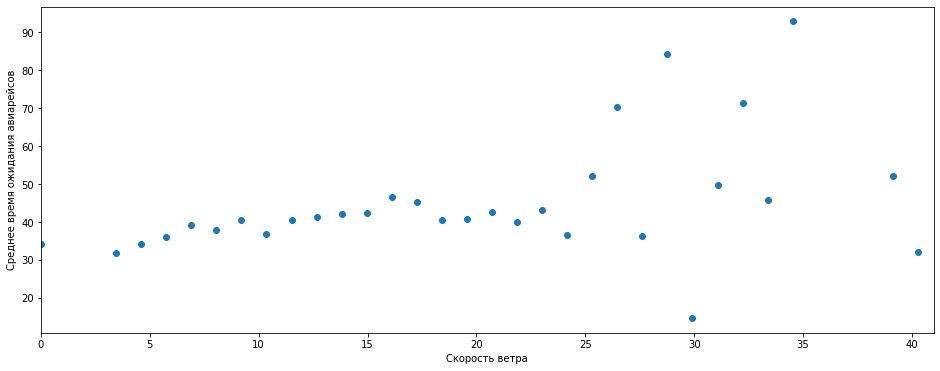

In [61]:
plt.figure(figsize = (16, 6))
plt.scatter(df_wind_merged.wind_speed, df_wind_merged.count_of_flights)

plt.xlim(0, 41)
plt.ylabel('Количество авиарейсов')
plt.xlabel('Скорость ветра')
plt.show()


plt.figure(figsize = (16, 6))
plt.scatter(df_wind_merged.wind_speed, df_wind_merged.mean_delay_dep)

plt.xlim(0, 41)
plt.ylabel('Среднее время ожидания авиарейсов')
plt.xlabel('Скорость ветра')
plt.show()

Из данных графиков тоже следует довольно очевидный вывод: при большей скорости ветра производится меньше полетов, а время их задержки становится более хаотчиным, нежели при маленькой скорости ветра, причем чаще всего в бОльшую сторону. Также не стоит удивляться тому факту, что график количества полетов от скорости сначала идет наверх: дней, когда ветер ~6-7 больше, чем дней, когда ветер меньше 

9. Посмотрим на осадки

In [62]:
df_precip = df_wth_fly_merged.dropna(subset = ['precip'])

In [63]:
grouped_data1 = pd.DataFrame(df_precip.groupby([df_precip.precip]).size().reset_index(name='count_of_flights'))
grouped_data2 = pd.DataFrame(df_fly.groupby([df_precip.precip])['dep_delay'].mean().reset_index(name='mean_delay_dep'))

In [64]:
df_precip_merged = pd.merge(grouped_data1, grouped_data2, on=['precip'])
print(df_precip_merged)

    precip  count_of_flights  mean_delay_dep
0     0.00             48447        8.604352
1     0.01              1157        8.024281
2     0.02               802        6.579474
3     0.03               469        3.659483
4     0.04               274        2.294118
5     0.05               251        8.099602
6     0.06               185       11.822857
7     0.07               145        8.687500
8     0.08                97        3.855670
9     0.09               116        4.715517
10    0.10                68        7.970588
11    0.11                46        2.565217
12    0.12                38       -1.105263
13    0.13                91        9.758242
14    0.14                49        2.530612
15    0.15                47        5.361702
16    0.16                64        8.234375
17    0.17                23        8.652174
18    0.18                 1       28.000000
19    0.19                42        4.595238
20    0.22                12       19.250000
21    0.23

Опустим случай с нулевыми осадками, когда производится большиство полетов:

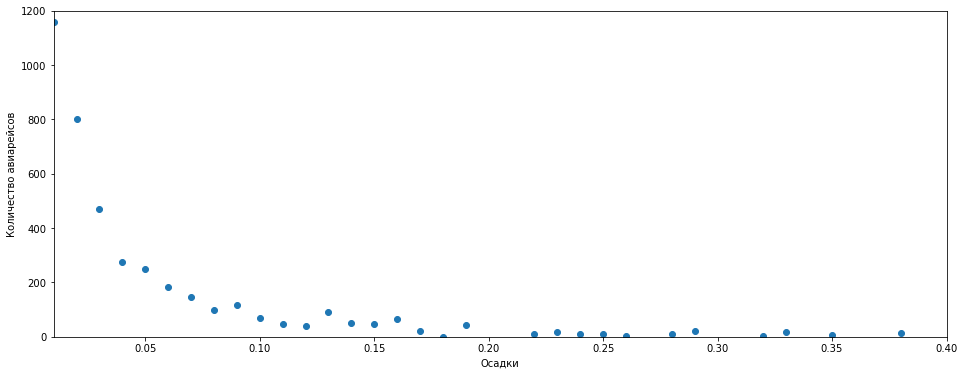

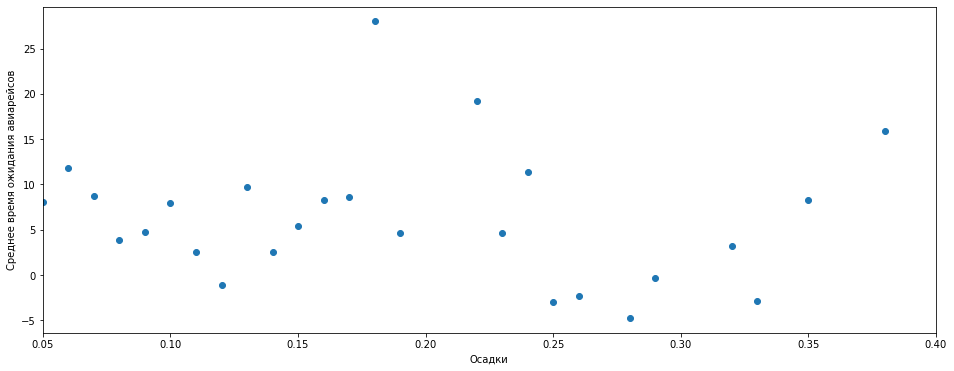

In [73]:
plt.figure(figsize = (16, 6))
plt.scatter(df_precip_merged.precip, df_precip_merged.count_of_flights)

plt.ylim(0, 1200)
plt.xlim(0.01, 0.40)
plt.ylabel('Количество авиарейсов')
plt.xlabel('Осадки')
plt.show()


plt.figure(figsize = (16, 6))
plt.scatter(df_precip_merged.precip, df_precip_merged.mean_delay_dep)

plt.xlim(0.05, 0.40)
plt.ylabel('Среднее время ожидания авиарейсов')
plt.xlabel('Осадки')
plt.show()

Видно, что чем больше осадков, тем меньше проводится рейсов, и с увеличением осадков среднее время ожадания становится более хаотичным

10. Попробуем найти более неочевидные закономерности от погодных условий:

а) Температура:

In [75]:
df_temp = df_wth_fly_merged.dropna(subset = ['temp'])

In [84]:
grouped_data1 = pd.DataFrame(df_temp.groupby([df_temp.temp]).size().reset_index(name='count_of_flights'))
grouped_data2 = pd.DataFrame(df_temp.groupby([df_temp.temp])['dep_delay'].mean().reset_index(name='mean_delay_dep'))

In [85]:
df_temp_merged = pd.merge(grouped_data1, grouped_data2, on=['temp'])
print(df_temp_merged)

       temp  count_of_flights  mean_delay_dep
0     10.94                14       59.357143
1     12.02                48       29.312500
2     12.92                61       35.295082
3     14.00                80       22.325000
4     15.08                14       17.142857
..      ...               ...             ...
131   96.08                53       36.169811
132   96.98                14       50.428571
133   98.06               112       35.160714
134   98.96                53       48.528302
135  100.04                26       45.692308

[136 rows x 3 columns]


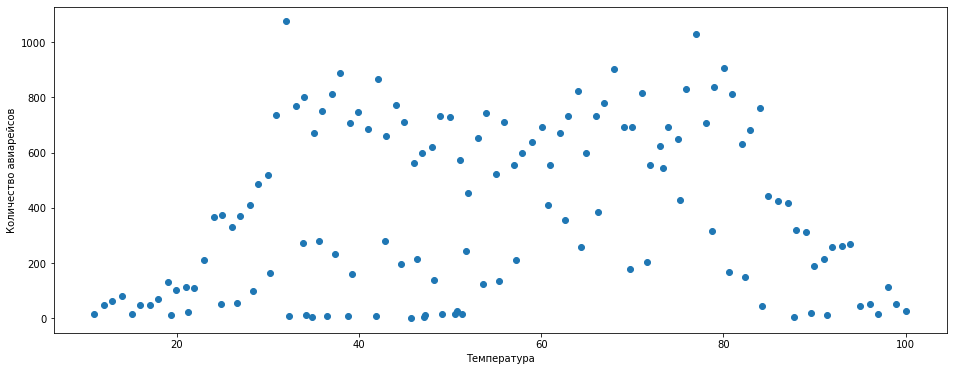

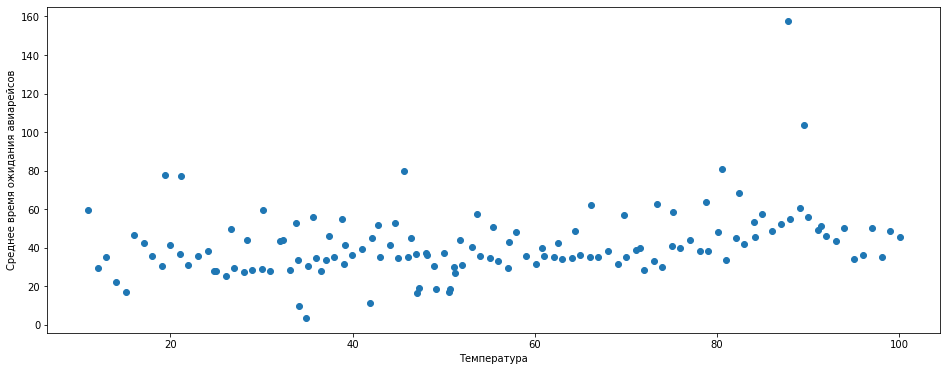

In [86]:
plt.figure(figsize = (16, 6))
plt.scatter(df_temp_merged.temp, df_temp_merged.count_of_flights)

plt.ylabel('Количество авиарейсов')
plt.xlabel('Температура')
plt.show()


plt.figure(figsize = (16, 6))
plt.scatter(df_temp_merged.temp, df_temp_merged.mean_delay_dep)

plt.ylabel('Среднее время ожидания авиарейсов')
plt.xlabel('Температура')
plt.show()

Можно сделать вывод, что температура - довольно необъективная мера оценивания, но все равно некоторые наблюдения провести можно:

1) Количество полетов от температуры не зависит: в графике прослеживается распределение Гаусса

2) При температуре, выше обычной, среднее время ожидания немного больше обычного

б) Давление

In [89]:
df_pressure = df_wth_fly_merged.dropna(subset = ['pressure'])

In [92]:
grouped_data1 = pd.DataFrame(df_pressure.groupby([df_pressure.pressure]).size().reset_index(name='count_of_flights'))
grouped_data2 = pd.DataFrame(df_pressure.groupby([df_pressure.pressure])['dep_delay'].mean().reset_index(name='mean_delay_dep'))

In [93]:
df_pressure_merged = pd.merge(grouped_data1, grouped_data2, on=['pressure'])
print(df_pressure_merged)

     pressure  count_of_flights  mean_delay_dep
0       983.9                14       31.285714
1       986.4                13       15.692308
2       992.3                15       52.200000
3       994.2                 7       71.285714
4       995.1                19       31.210526
..        ...               ...             ...
403    1041.2                 6       11.666667
404    1041.4                 8       15.750000
405    1041.6                 3        7.000000
406    1041.8                 8       16.500000
407    1041.9                 5       16.600000

[408 rows x 3 columns]


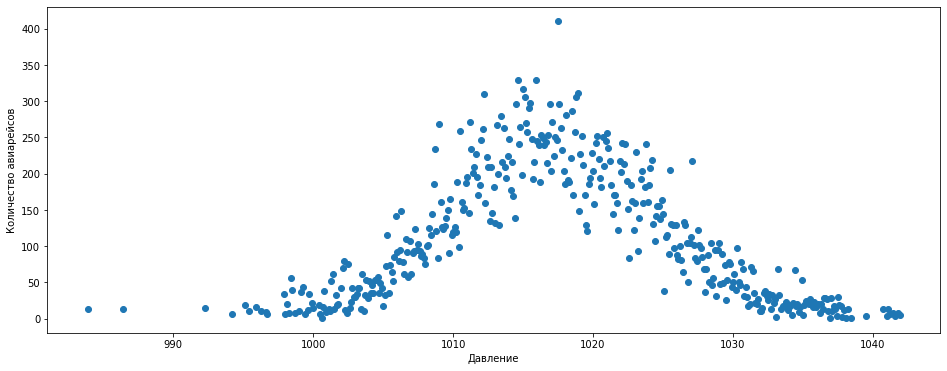

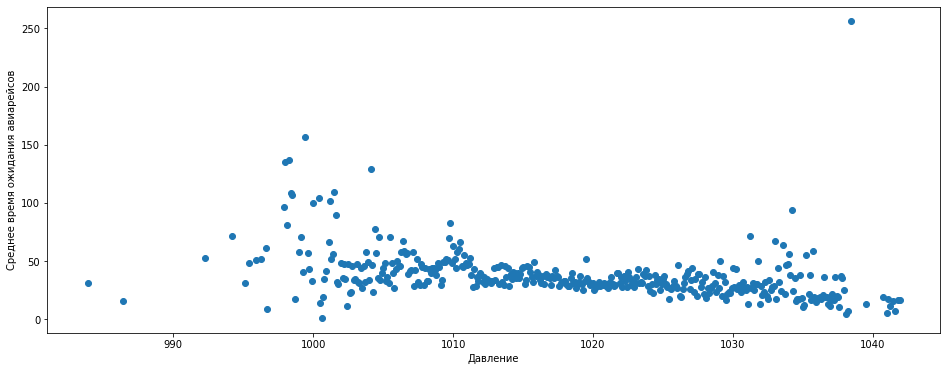

In [95]:
plt.figure(figsize = (16, 6))
plt.scatter(df_pressure_merged.pressure, df_pressure_merged.count_of_flights)

plt.ylabel('Количество авиарейсов')
plt.xlabel('Давление')
plt.show()


plt.figure(figsize = (16, 6))
plt.scatter(df_pressure_merged.pressure, df_pressure_merged.mean_delay_dep)

plt.ylabel('Среднее время ожидания авиарейсов')
plt.xlabel('Давление')
plt.show()

Опять же, этот критерий не совсем состоятельной, но похожие выводы сделать можно:

1) Количество полетов все так же не зависит от давления: распределение Гаусса видно еще четче

2) При низком давлении среднее время ожидания ведет себя хаотично, но чаще оно выше обычного